In [1]:
!mkdir -p /content/dataset
%cd /content/dataset

!wget https://zenodo.org/record/1327317/files/training_set.zip
!wget https://zenodo.org/record/1327317/files/test_set.zip
!wget https://zenodo.org/record/1327317/files/training_set_pixel_size_and_HC.csv
!wget https://zenodo.org/record/1327317/files/test_set_pixel_size.csv

!ls -lh


/content/dataset
--2026-01-22 12:39:10--  https://zenodo.org/record/1327317/files/training_set.zip
Resolving zenodo.org (zenodo.org)... 188.185.43.153, 188.185.48.75, 137.138.52.235, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.153|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1327317/files/training_set.zip [following]
--2026-01-22 12:39:12--  https://zenodo.org/records/1327317/files/training_set.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 132926838 (127M) [application/octet-stream]
Saving to: ‘training_set.zip’

training_set.zip    100%[===================>] 126.77M   792KB/s    in 2m 55s  

2026-01-22 12:42:07 (744 KB/s) - ‘training_set.zip’ saved [132926838/132926838]

--2026-01-22 12:42:07--  https://zenodo.org/record/1327317/files/test_set.zip
Resolving zenodo.org (zenodo.org)... 188.185.48.75, 137.138.52.235, 188.185.43.153, ...
Connecting to zenodo.org (zen

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Archive:  training_set.zip
   creating: training_set/
 extracting: training_set/000_HC.png  
  inflating: training_set/000_HC_Annotation.png  
 extracting: training_set/001_HC.png  
  inflating: training_set/001_HC_Annotation.png  
 extracting: training_set/002_HC.png  
  inflating: training_set/002_HC_Annotation.png  
 extracting: training_set/003_HC.png  
  inflating: training_set/003_HC_Annotation.png  
 extracting: training_set/004_HC.png  
  inflating: training_set/004_HC_Annotation.png  
 extracting: training_set/005_HC.png  
  inflating: training_set/005_HC_Annotation.png  
 extracting: training_set/006_HC.png  
  inflating: training_set/006_HC_Annotation.png  
 extracting: training_set/007_HC.png  
  inflating: training_set/007_HC_Annotation.png  
 extracting: training_set/008_HC.png  
  inflating: training_set/008_HC_Annotation.png  
 extracting: training_set/009_HC.png  
  inflating: training_set/009_HC_Annotation.png  
 extracting: training_set/010_2HC.png  
  inflating: tra

In [44]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

test_set_pixel_size = pd.read_csv('test_set_pixel_size.csv')
train_set_pixel_size = pd.read_csv('training_set_pixel_size_and_HC.csv')
display(test_set_pixel_size)
display(train_set_pixel_size)

,filename,pixel size(mm)
0,000_HC.png,0.235857
1,001_HC.png,0.067973
2,002_HC.png,0.165202
3,003_HC.png,0.096674
4,004_HC.png,0.202203
...,...,...
330,330_HC.png,0.138479
331,331_HC.png,0.075739
332,332_HC.png,0.113107
333,333_HC.png,0.219140


,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81
...,...,...,...
994,801_HC.png,0.296851,329.26
995,802_HC.png,0.212267,330.90
996,803_HC.png,0.202743,331.70
997,804_HC.png,0.281090,316.48


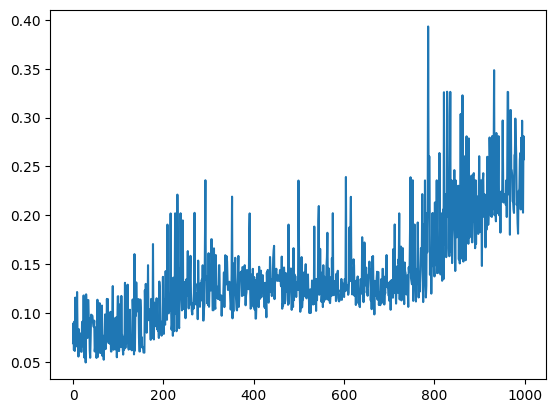

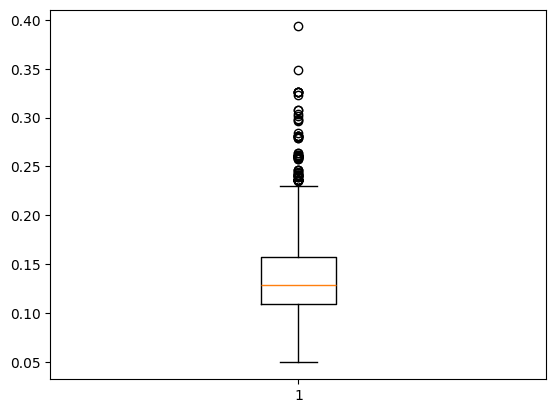

In [29]:
plt.plot(train_set_pixel_size['pixel size(mm)'])
plt.show()
plt.boxplot(train_set_pixel_size['pixel size(mm)'])
plt.show()

In [48]:
x = train_set_pixel_size.drop(['filename', 'pixel size(mm)'], axis=1)
y = train_set_pixel_size['pixel size(mm)']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=16
)
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (y_train >= lower_bound) & (y_train <= upper_bound)
new_x_train = x_train.loc[mask]
new_y_train = y_train.loc[mask]

In [49]:
model = LinearRegression()
model.fit(new_x_train, new_y_train)
y_pred = model.predict(x_test)
print(mae(y_test, y_pred))

0.02093148348802604
